In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.tree import export_graphviz
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [8]:
#p1
titanic=pd.read_csv("C:/Users/acer/Desktop/HW2_9823033/titanic.csv")

In [9]:
#p2
titanic = titanic.dropna(how='any',axis=0) 
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
#p3
titanic.drop("PassengerId",axis=1,inplace=True)
titanic.drop("Parch",axis=1,inplace=True)
titanic.drop("SibSp",axis=1,inplace=True)
titanic.drop("Ticket",axis=1,inplace=True)
titanic.drop("Name",axis=1,inplace=True)
print(titanic)
print(titanic.describe())

     Survived  Pclass     Sex   Age     Fare        Cabin Embarked
1           1       1  female  38.0  71.2833          C85        C
3           1       1  female  35.0  53.1000         C123        S
6           0       1    male  54.0  51.8625          E46        S
10          1       3  female   4.0  16.7000           G6        S
11          1       1  female  58.0  26.5500         C103        S
..        ...     ...     ...   ...      ...          ...      ...
871         1       1  female  47.0  52.5542          D35        S
872         0       1    male  33.0   5.0000  B51 B53 B55        S
879         1       1  female  56.0  83.1583          C50        C
887         1       1  female  19.0  30.0000          B42        S
889         1       1    male  26.0  30.0000         C148        C

[183 rows x 7 columns]
         Survived      Pclass         Age        Fare
count  183.000000  183.000000  183.000000  183.000000
mean     0.672131    1.191257   35.674426   78.682469
std      0

In [11]:
#p4
titanic=pd.get_dummies(titanic,drop_first=True)
print(titanic)

     Survived  Pclass   Age     Fare  Sex_male  Cabin_A16  Cabin_A20  \
1           1       1  38.0  71.2833         0          0          0   
3           1       1  35.0  53.1000         0          0          0   
6           0       1  54.0  51.8625         1          0          0   
10          1       3   4.0  16.7000         0          0          0   
11          1       1  58.0  26.5500         0          0          0   
..        ...     ...   ...      ...       ...        ...        ...   
871         1       1  47.0  52.5542         0          0          0   
872         0       1  33.0   5.0000         1          0          0   
879         1       1  56.0  83.1583         0          0          0   
887         1       1  19.0  30.0000         0          0          0   
889         1       1  26.0  30.0000         1          0          0   

     Cabin_A23  Cabin_A24  Cabin_A26  ...  Cabin_E8  Cabin_F G63  Cabin_F G73  \
1            0          0          0  ...         0   

In [12]:
#p5
x=titanic.drop('Survived',axis=1)
Y=titanic['Survived']
print(x)

     Pclass   Age     Fare  Sex_male  Cabin_A16  Cabin_A20  Cabin_A23  \
1         1  38.0  71.2833         0          0          0          0   
3         1  35.0  53.1000         0          0          0          0   
6         1  54.0  51.8625         1          0          0          0   
10        3   4.0  16.7000         0          0          0          0   
11        1  58.0  26.5500         0          0          0          0   
..      ...   ...      ...       ...        ...        ...        ...   
871       1  47.0  52.5542         0          0          0          0   
872       1  33.0   5.0000         1          0          0          0   
879       1  56.0  83.1583         0          0          0          0   
887       1  19.0  30.0000         0          0          0          0   
889       1  26.0  30.0000         1          0          0          0   

     Cabin_A24  Cabin_A26  Cabin_A31  ...  Cabin_E8  Cabin_F G63  Cabin_F G73  \
1            0          0          0  ... 

In [13]:
#p6
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.3)
print(x_train.shape,x_test.shape)

(128, 138) (55, 138)


In [14]:
#p7

model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train,Y_train)
pred_test=model.predict(x_test)
pred_train=model.predict(x_train)
test_acc=accuracy_score(Y_test,pred_test)
train_acc=accuracy_score(Y_train,pred_train)
print('test_accuracy: ',test_acc)
print('train_accuracy: ',train_acc)
accuracy = model.score(x_test, Y_test)
print('Decision Tree Accuracy:',(accuracy*100).round(2),'%')

test_accuracy:  0.8363636363636363
train_accuracy:  1.0
Decision Tree Accuracy: 83.64 %


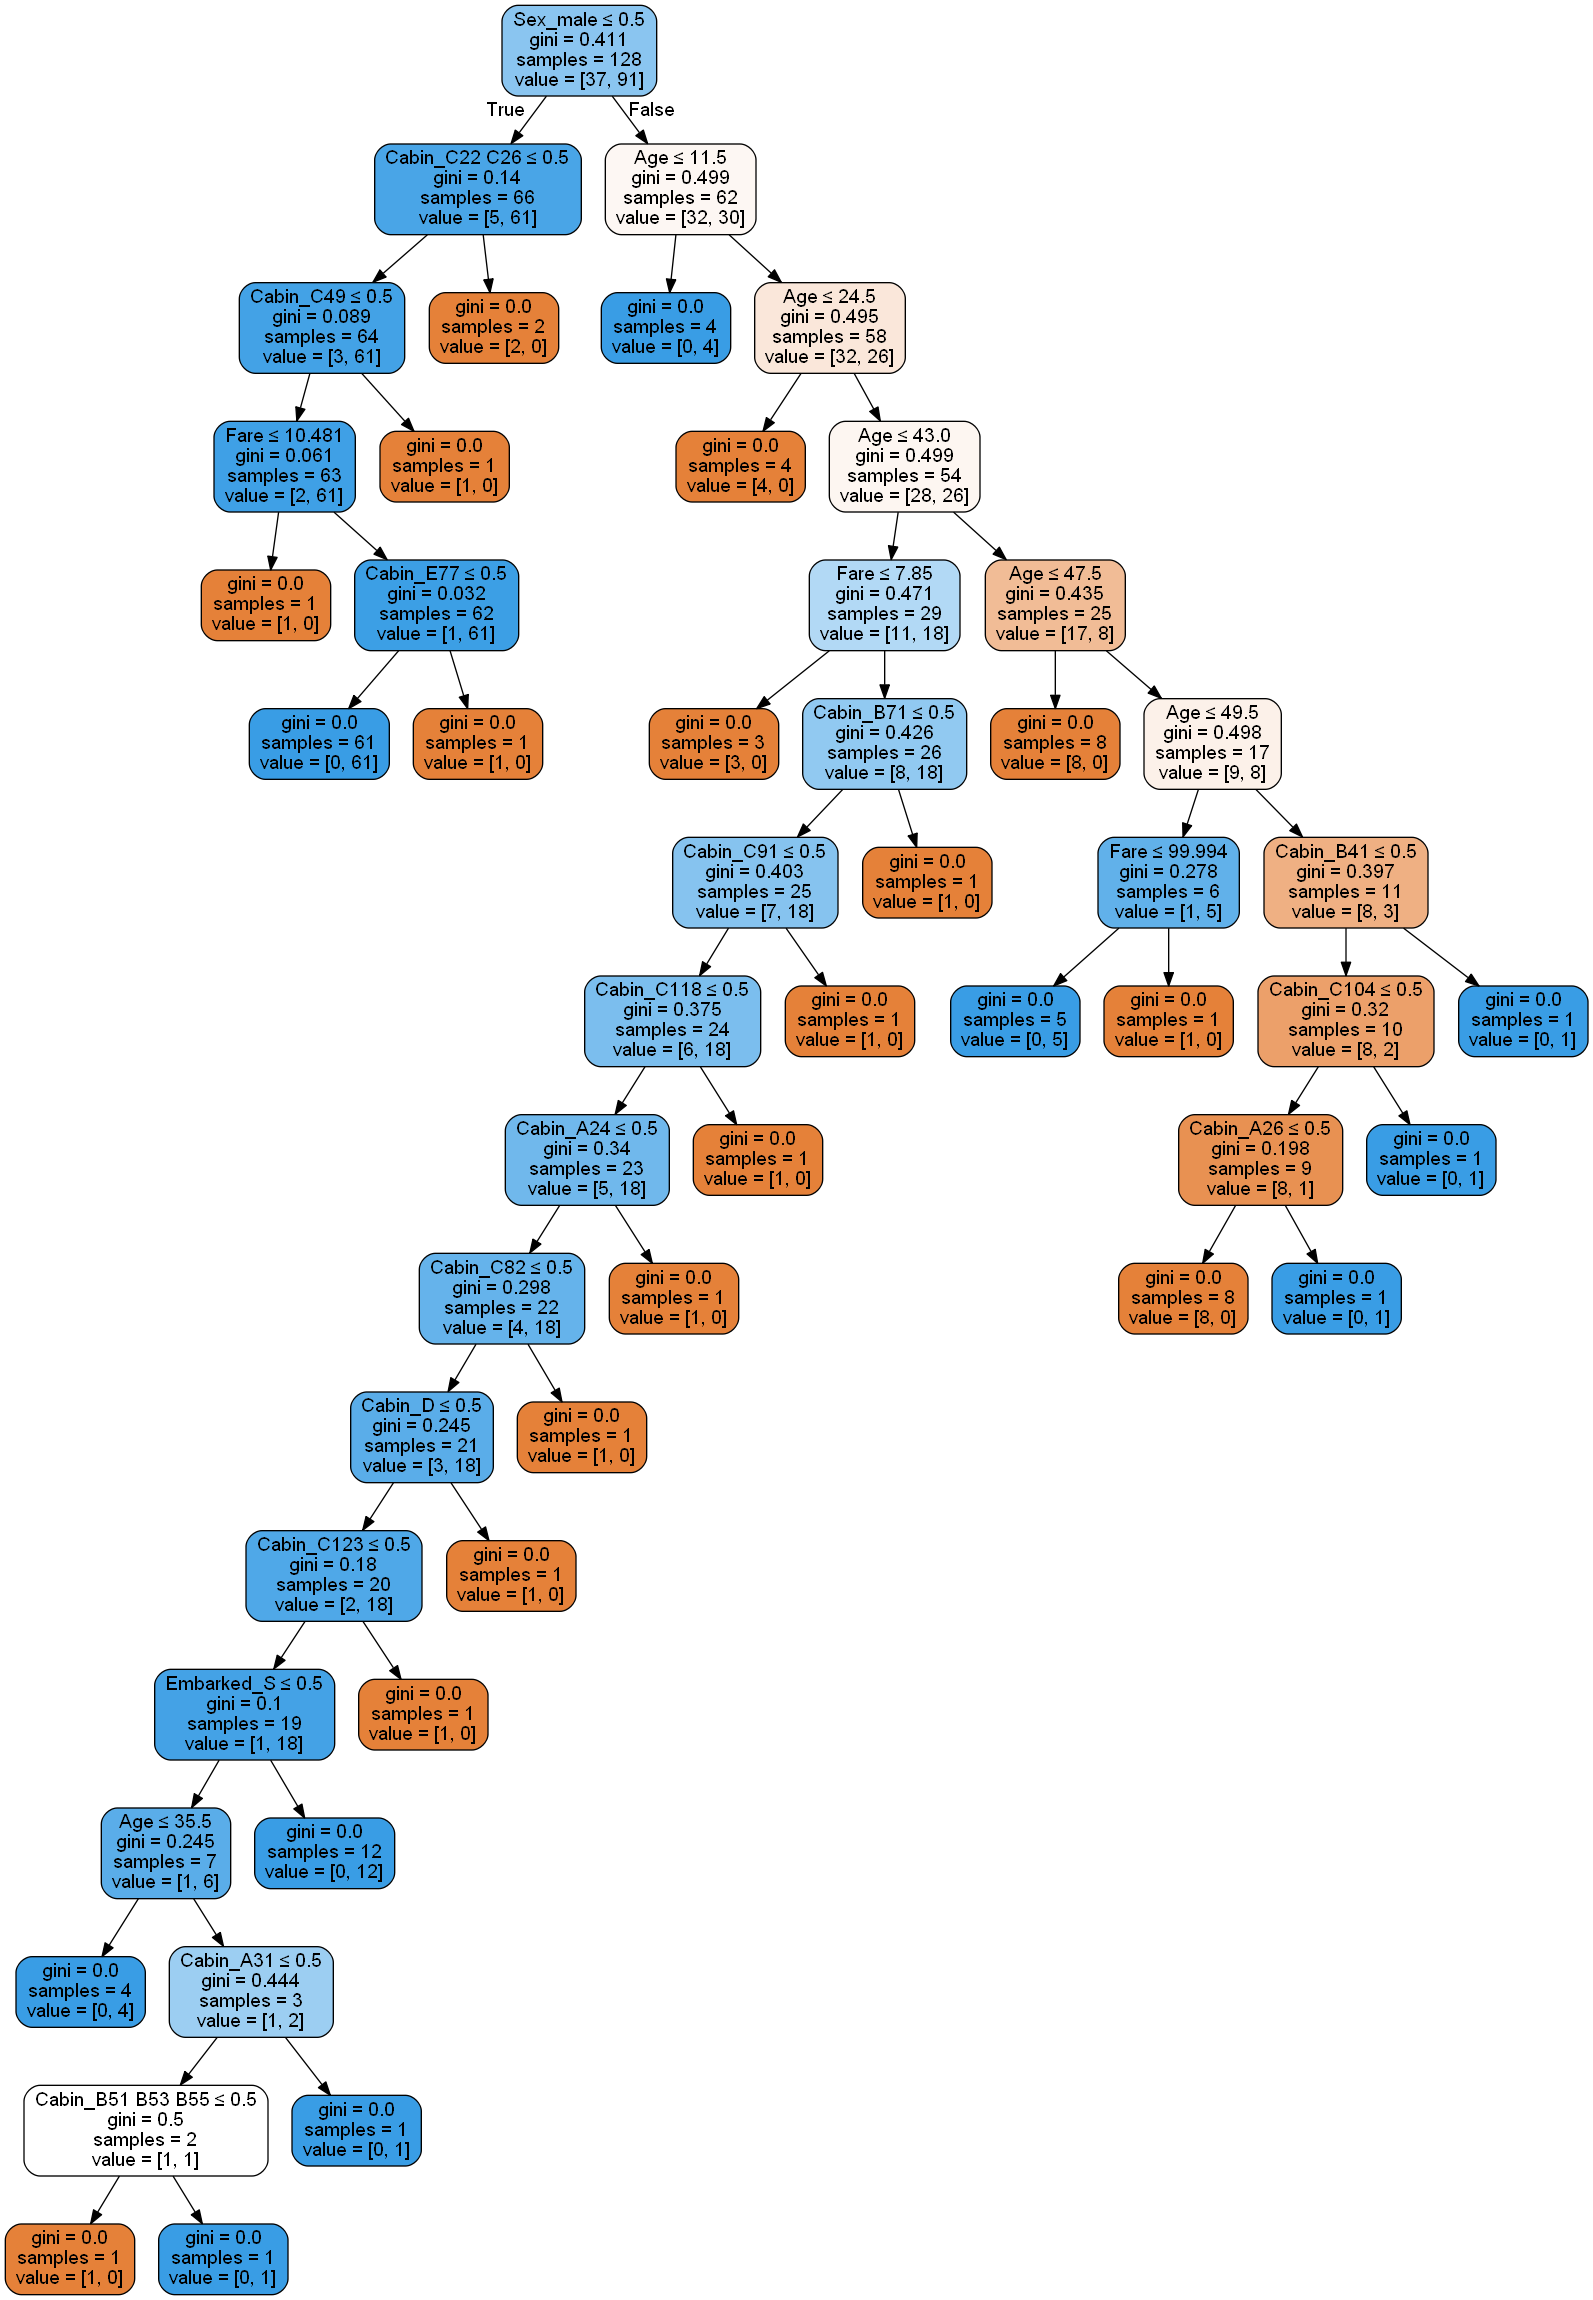

In [15]:
#p8_graphviz
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_tree = tree.export_graphviz(model, out_file=None, filled=True, rounded=True,special_characters=True,feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

In [18]:
# part9 .اور فیتینگ رخ داده است چون دقت روی داده های ترین در پارت 7 یک شده در حالی که دقت روی داده های تست 83 درصد بوده است این مسئله نشان میدهد مدل داده ها را کاملا حفظ کرده وحتی نویز ها هم یاد گرفته و صرفا به دنبال الگوهای پرتکرار نبوده بنابراین روی داده های آموزش کاملا درست عمل کرده در حالی که روی داده های تست که جدید وارد شده بودند عملکرد نسبتا ضعیفی دارد و نمیتواند داده های جدید را با توجه به الگو ها پیش بینی کند
#از طرف دیگر همانطور که در قسمت قبل مشاهده کردیم درخت تا انتها کاملا رشد کرده و برگ ها خالص هستند که نتیجه میگیریم اور فیت شده است
#برای حل مشکل اورفیتینگ باید از پیش هرس یا پس هرس درخت استفاده کرد.به این منظور میتوان تعدادی از داده های ترین را به عنوان مجموعه ولیدیشن جدا کرده و قبل از اینکه درخت بزرگ شود در هر مرحله خطا روی ولیدیشن ست را حساب کرده و اگر لازم بود مشخص کنیم درخت نباید بزرگتر از این شود. که این رویکرد قانون پایان آموزش را کنترل میکند. این رویکرد پیش هرس است. رویکرد دیگری که میتوان استفاده کرد پس هرس بوده که اجازه یدهیم درخت تا انتها پیش رفته و رشد کند سپس شاخه های اضافی یا آنومالی ها را از آن حذف میکنیم. گاهی اورفیتینگ به این دلیل رخ میدهد که تعداد داده های ترین کافی نیست و این مسئله باعث میشود نویز در داده ها خود را بیشتر نشان دهد و درخت براساس نویز و انومالی ها شکل گیرد پس راه حل دیگر برای این مشکل بزرگتر کردن مجموعه داده های ترین است 

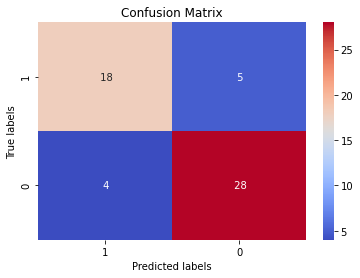

In [17]:
#p10
def plot_confusion_matrix(y,y_predict):
 cm = confusion_matrix(y, y_predict)
 ax= plt.subplot()
 sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
 ax.set_xlabel('Predicted labels')
 ax.set_ylabel('True labels')
 ax.set_title('Confusion Matrix');
 ax.xaxis.set_ticklabels(['1','0']); ax.yaxis.set_ticklabels(['1','0'])

plot_confusion_matrix(Y_test,pred_test)

#error_rate=(5+4)/55=0.16
#ارور ریت نسبتا پایینی دارد پس مشخص میشود که حدودا 83 درصد دقت داشته و داده ها را درست پیش بینی کرده.5 تا از یک ها را صفر و4 تا از صفرها را یک پیش بینی کرده 

In [19]:
#p11
parameters = {'max_depth': range(1, 10), 
              'min_samples_leaf': range(1, 10)}
search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=parameters,cv=5,refit=True)
search.fit(x_train, Y_train)
print("Best Parameters :",search.best_params_)
print("GridSearch Score :",(search.best_score_*100).round(2),'%')

y_pred_train = search.predict(x_train)
train_acc=accuracy_score(Y_train,y_pred_train)
print('train_accuracy: ',train_acc)

y_pred_test = search.predict(x_test)
test_acc=accuracy_score(Y_test,y_pred_test)
print('test_accuracy: ',test_acc)

accuracy1 = search.score(x_test, Y_test)
print('Decision Tree Accuracy:',(accuracy1*100).round(2),'%')

y_predict = search.best_estimator_.predict(x_test)
print("Tuned Decision Tree Model Accuracy:",
 (accuracy_score(Y_test, y_predict)*100).round(2),'%')

# خیر. دقت روی داده های ترین کاهش و دقت روی داده های تست ثابت مانده است و مدل کلی مدل بهتر نشده است . دقت کلی مدل نیز ثابت مانده است.

Best Parameters : {'max_depth': 8, 'min_samples_leaf': 1}
GridSearch Score : 75.85 %
train_accuracy:  0.953125
test_accuracy:  0.8363636363636363
Decision Tree Accuracy: 83.64 %
Tuned Decision Tree Model Accuracy: 83.64 %


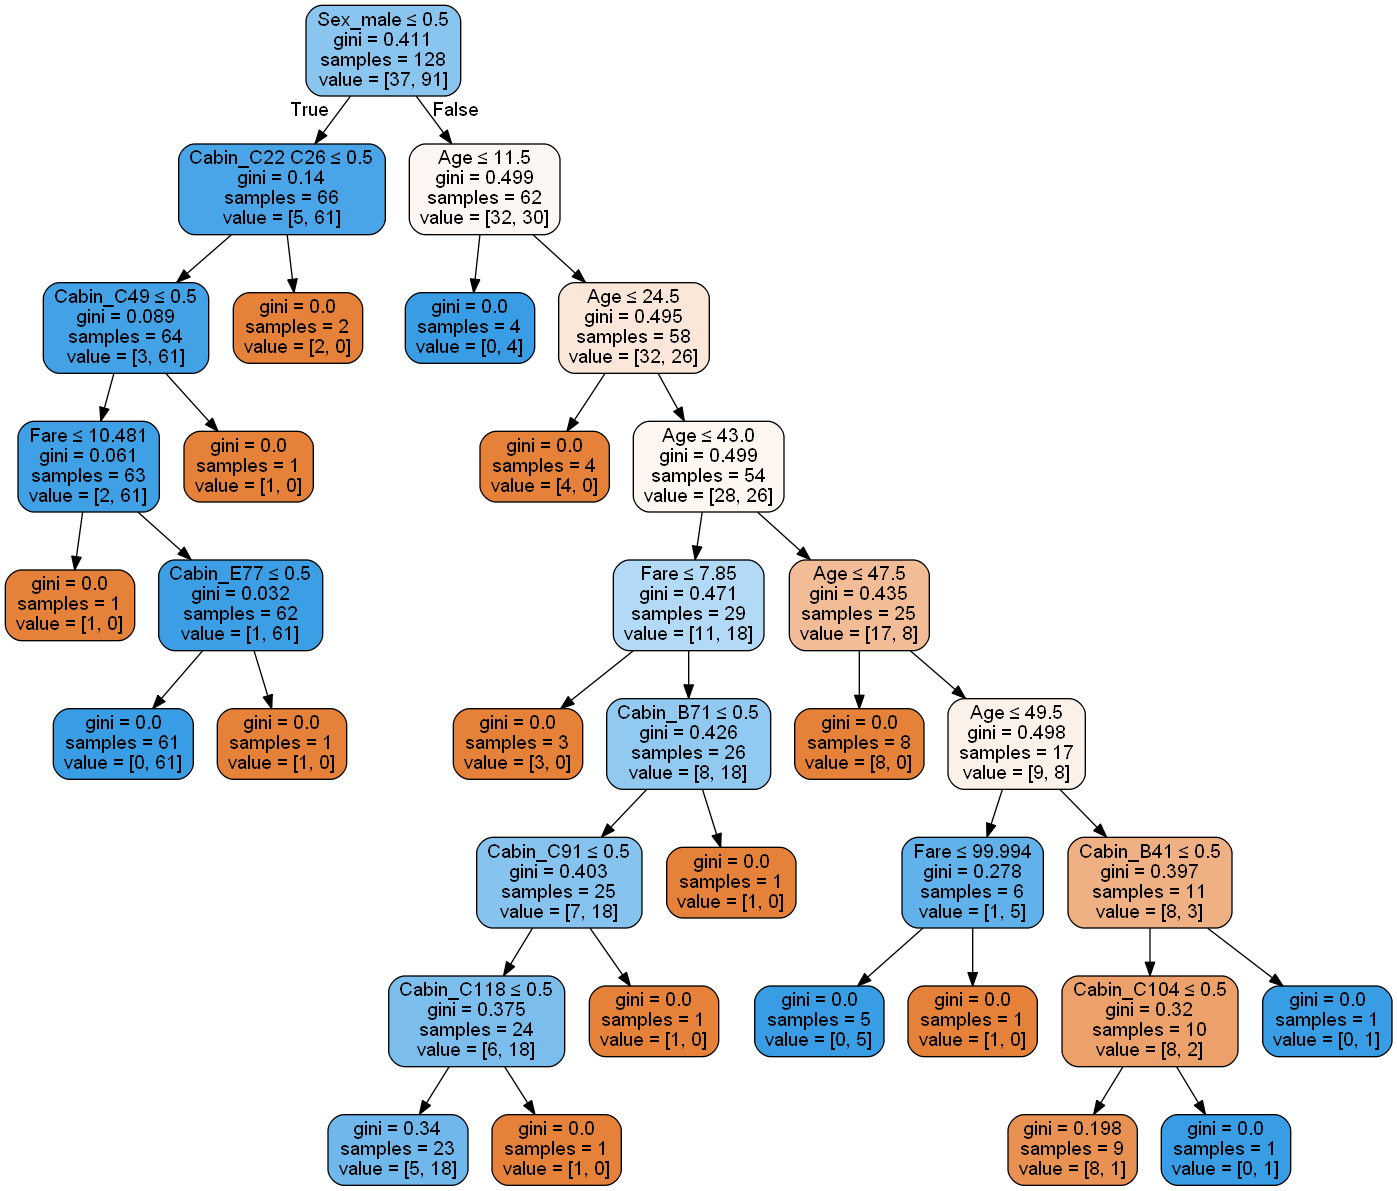

In [20]:
#part12
best_model = search.best_estimator_ 

dot_tree = tree.export_graphviz(best_model, out_file=None, filled=True, rounded=True,special_characters=True,feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

In [22]:
#part13
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, Y_train)

#part14
pred_test_clf=clf.predict(x_test)
pred_train_clf=clf.predict(x_train)
test_acc_clf=accuracy_score(Y_test,pred_test_clf)
train_acc_clf=accuracy_score(Y_train,pred_train_clf)
print('test_accuracy: ',test_acc_clf)
print('train_accuracy: ',train_acc_clf)
accuracy = clf.score(x_test, Y_test)
print('Decision Tree Accuracy:',(accuracy*100).round(2),'%')

#دقت روی داده های ترین هیچ تغییری نکرده و هر دو یک هستند ولی دقت روی داده ی تست به اندازه 14 درصد کاهش داشته

test_accuracy:  0.6909090909090909
train_accuracy:  1.0
Decision Tree Accuracy: 69.09 %


In [31]:
#part15
#[100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]
params ={
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf' : range(1,10),
    'bootstrap': [True, False],
    'n_estimators' : range(100,1300,300),
    'criterion':['gini','entropy']
}

random_search = RandomizedSearchCV(clf, params, n_iter=50, n_jobs=-1)
random_search.fit(x_train,Y_train)
random_search.best_params_

#part16
#آنتروپی بهتر است با توجه به نتیجه رندوم سرچ

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.71107692 0.71107692 0.71107692 0.73446154 0.71107692 0.71107692
 0.71107692 0.71107692 0.71107692 0.71107692 0.71107692 0.71107692
 0.71107692 0.71107692 0.71107692 0.71107692 0.71107692 0.71107692
 0.72676923 0.72676923 0.71107692 0.71107692 0.71107692 0.72646154
 0.71107692 0.71107692 0.71107692        nan 0.71107692        nan
 0.71107692        nan 0.71107692 0.71107692 0.71107692 0.71107692
 0.71107692 0.71107692        nan 0.71107692 0.71107692 0.71107692
 0.71107692 0.71107692 0.71107692 0.71107692 0.71107692 0.71107692
        nan        nan]
  warnings.warn(


{'n_estimators': 400,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_depth': 8,
 'criterion': 'entropy',
 'bootstrap': False}